[View in Colaboratory](https://colab.research.google.com/github/calicinio/Testando/blob/master/Copy_of_Naive_Bayes_e_An%C3%A1lise_Discriminante_Linear.ipynb)


# Naive Bayes - Teoria

## Histórico

O algoritmo “Naive Bayes” é um classificador probabilístico baseado no “Teorema de Bayes”, o qual foi criado por Thomas Bayes (1701 - 1761) para tentar provar a existência de Deus. Atualmente, o algoritmo se tornou popular na área de Aprendizado de Máquina (Machine Learning) para categorizar textos baseado na frequência das palavras usadas, e assim pode ser usado para identificar se determinado e-mail é um SPAM ou sobre qual assunto se refere determinado texto, por exemplo.

______________________________________________________________________________________

Por ser muito simples e rápido, possui um desempenho relativamente maior do que outros classificadores. Além disso, o Naive Bayes só precisa de um pequeno número de dados de teste para concluir classificações com uma boa precisão. A principal característica do algoritmo, e também o motivo de receber “naive” (ingênuo) no nome, é que ele desconsidera completamente a correlação entre as variáveis (features).



Um problema clássico utilizando o algoritmo de Naive bayes é o de classificação de spam, por isso vamos implementá-lo utilizando a biblioteca *scikit-learn*. 

Teorema de Bayes fornece uma forma de calcular a probabilidade posterior P (C | X) a partir de P (C), P (x) e P (X | c). Veja a equação abaixo:


![alt text](https://www.vooo.pro/insights/wp-content/uploads/2016/04/probabilidade-Bayes.png)

Tendo como um dos exemplos clássicos que utiliza a variável clima e da correspondente variável-alvo ‘Play’ (sugerindo possibilidades de de um jogo acontecer) Para isso , se faze necessário classificar se os jogadores vão jogar ou não com base na condição meteorológica.

Um exemplo de como seria o cálculo de probabilidade de uma evento posterior será dado abaixo:

![alt text](https://www.vooo.pro/insights/wp-content/uploads/2016/04/tabela-bayes-768x238.png)



Passo 1: Converter o conjunto de dados em uma tabela de frequência

Passo 2: Criar tabela de Probabilidade ao encontrar as probabilidades.
  - Ex: tempo Nublado = 0,29 e probabilidade de jogar = 0,64.

Passo 3: Utilizar a equação Bayesiana Naive para calcular a probabilidade posterior para cada classe. A classe com maior probabilidade posterior é o resultado da previsão.  

---
 Dado a condição: Podemos resolver isso usando o método discutido acima de probabilidade posterior.

P (Sim | ensolarado) = P (ensolarado | Sim) * P (Sim) / P (ensolarado)

Aqui temos P (ensolarado | Sim) = 3/9 = 0,33, P (ensolarado) = 5/14 = 0,36, P (Sim) = 9/14 = 0,64

Agora, P (Sim | ensolarado) = 0,33 * 0,64 / 0,36 = 0,60, que tem maior probabilidade.


---




Naive Bayes usa um método similar para prever a probabilidade de classe diferente com base em vários atributos. 

In [0]:
import pandas as pd
import string 
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score,f1_score
import csv

##Carregamento dos dados
A base de dados utilizada nesse exemplo foi  disponibilizada no Git Hub para a comunidade de aprendizado de máquina.

Informações da base de dados:

**Coluna 1**: Classificação da mensagem, SPAM ou HAM.

Obs: SPAM nada mais é do que uma mensagem indesejada. No entanto, muitas vezes as pessoas não percebem que estão se inscrevendo para malas diretas quando baixam softwares gratuitos ou se inscrevem em um novo serviço, ou mesmo quando atualizam softwares existentes. Esses e-mail recebidos por inscrições feitas de forma indireta são classificados como HAM.

**Coluna 2**: Mensagem de texto a serem classificadas

In [2]:
df = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT4/master/data/sms.tsv',
                   sep='\t',
                   header=None,
                   names=['label', 'sms_message'])

print(df.shape)
df.head(10)

(5572, 2)


,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


##Processamento dos dados

Para fazer a classificação das mensagens, os marcadores "ham" e "spam" devem ser substituídos por 0 e 1, respectivamente.

Sugestão: utilize a função *df.label.map* 

In [3]:
df['label'] = df.label.map({'spam': 1, 'ham':0})

df.head(10)

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


##Tratamento das mensagens

Uma vez que a base de dados utilizada possui uma coluna de textos e o classificador naive Bayes é mais eficiente para dados de entrada numéricos, é necessário fazer algumas adaptações. 

Para isso, uma alternativa é utilizar o método mala de palavras" [[bag of words](https://scikit-learn.org/stable/modules/feature_extraction.html)] para contar a frequência de ocorrência de cada palavra. É válido ressaltar que esse método assume o mesmo peso para todas as palavras da "sacola" e não considera a ordem de ocorrência das palavras.

Devem ser executados os seguintes passos:

1.   Converter todas as palavras do saco para letras minúsculas
2.   Remover a pontuação das frases
3.   Fragmentar as frases em palavras
4.   Contar a frequência de cada palavra

Os passos apresentados ficariam assim, para a primeira mensagem da base de dados: *Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...*

1.   go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
2.   go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
3.   'go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat'
4.   'available': 1, 'crazy': 1, 'cine': 1, 'e': 1, 'jurong': 1, 'got': 1, 'point': 1, 'there': 1, 'la': 1, 'great': 1, 'buffet': 1, 'bugis': 1, 'wat': 1, 'only': 1, 'in': 1, 'go': 1, 'world': 1, 'n': 1, 'until': 1, 'amore': 1

O método *sklearn.feature_extraction.text.CountVectorizer* simplifica esse processo. 

In [0]:
# Passos 1, 2 e 3
count_vector = CountVectorizer() #set the variable
count_vector.fit(df['sms_message']) #fit the function
count_vector.get_feature_names() #get the outputs

# Cria um array para cada linha da base de dados contendo a contagem de palavras
doc_array = count_vector.transform(df['sms_message']).toarray()

# Converte os array obtidos em uma matrix
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix.head(10)

##Classificador Naive Bayes

Separe a base de dados nas variáveis *X_train*, *X_test*, *y_train* e *y_test* para realizar a classificação. Não se esqueça de definir a proporção entre o conjunto de teste e o conjunto de treinamento.

A seguir, a classificação é feita usando o método *sklearn.nive_bayes* da SciKit-Learn.

1. Crie uma variável *naive_bayes* e atribua a ela a chama do método *MultinomialNB()*
2. Treine o classificador chamando o método *fit* para a variável criada. Passe como parâmetros as variáveis *train* e *y-train*
3. Faça as predições baseada no modelo treinado chamando o método *predict* para a variável *naive_bayes*. Passe como parâmetros a variável *test*

In [0]:

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'],
                                                    df['label'],
                                                    random_state=1)

train = count_vector.fit_transform(X_train)
test = count_vector.transform(X_test)

# Chama o método
naive_bayes = MultinomialNB()

# Treina o classificador
naive_bayes.fit(train, y_train)

# Realiza as predições baseado no modelo treinado
predictions = naive_bayes.predict(test)

##Avaliação do modelo

Para avaliar o modelo encontrado, usaremos duas métricas:

*   Acurácia: razão entre o número de predições corretas e o número total de predições
*   Precisão: razão entre o número de mensagens classificadas corretamente como SPAM

Utilizando as métricas de classificação do módulo *sklearn.metrics*, encontre os valores das duas variáveis apresentadas.

In [7]:
acuracia = accuracy_score(y_pred=predictions, y_true=y_test)
precisao = precision_score(y_pred=predictions, y_true=y_test)

print 'Acurácia: %f' % acuracia
print 'Precisão: %f' % precisao

Acurácia: 0.988514
Precisão: 0.972067


# **Conclusão**

**Prós:** 



1.   É fácil e rápido para prever o conjunto de dados da classe de teste. Também tem um bom desempenho na previsão de classes múltiplas.
2.   O desempenho é bom em caso de variáveis categóricas de entrada comparada com a variáveis numéricas. Para variáveis numéricas, assume-se a distribuição normal (curva de sino, que é uma suposição forte).

_____________________________________________________________________________________


**Contras:** 




1.   Se a variável categórica tem uma categoria (no conjunto de dados de teste) que não foi observada no conjunto de dados de treinamento, então o modelo irá atribuir uma probabilidade de 0 (zero) e não será capaz de fazer uma previsão. Isso é muitas vezes conhecido como “Zero Frequency”. Para resolver isso, podemos usar a técnica de alisamento. Uma das técnicas mais simples de alisamento é a chamada estimativa de Laplace.
2.   Por outro lado naive Bayes é também conhecido como um mau estimador, por isso, as probabilidades calculadas não devem ser levadas muito a sério.
2. Outra limitação do Naive Bayes é a suposição de preditores independentes. Na vida real, é quase impossível que ter um conjunto de indicadores que sejam completamente independentes.


# **Análise Discriminante Linear**

A análise discriminante linear (LDA) é um método utilizado em problemas de classificação. Esta técnica utiliza uma combinação linear de características originais e se caracteriza por produzir a separação máxima entre duas populações.

Enquanto a regressão logística classifica suas amostras de forma direta utizando a função logística, a LDA realiza a classificação de forma menos direta. No LDA a distribuição dos preditores $X$ é modelada separadamente em cada uma das classes de resposta (quando o  $Y$ é conhecido), então utiliza-se o teorema de Bayes para inverte-los em torno de estimativas para $Pr(Y=k|X=x)$. Quando estas distribuições são consideradas normais verifica-se que o modelo é muito parecido com a forma da regressão logística.


A função discriminante linear é dada por:

$f_i$=$\mu_i$$C^{⁻1}$$x_k^T$$-$$0.5$$\mu_i$$C^{⁻1}$$\mu_i^T$$+ln(p_i)$

sendo $\mu$ o centróide de cada classe, $C$ a matriz de covariância e $p$ é estimado através da aproximação do classificador Bayes.


A análise discriminante linear é usada principalmente nas seguintes situações:
*   Quando tem-se mais de duas classes de resposta.
*   Quando as classes são bem separadas, o parâmetro para o modelo de regressão logística pode ser muito instável. A LDA não tem esse problema.
*  Se no número de amostras $n$ for pequeno e a distribuição dos preditores $X$ for aproximadamente normal, o modelo LDA é mais estável que o modelo de regressão logística.

Inicialmente, iremos carregar todas as bibliotecas que iremos utilizar:

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import linalg
from matplotlib import colors

###Primeiro Exemplo

Os dados desse notebook foram extraídos da base de dados Iris, essa base de dados tem 50 amostras de três amostras de Iris: Iris setosa, Iris virginica e Iris versicolor. Quatro características foram medidas de cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.  Os dados nessa base estão divididos em: data, target e target_names. O valores de entrada $X$ deverão receber os valores de data, os valores de saída $y$ deverão receber os valores de target e target_name receberá os valores de target_name. 

In [0]:
iris = datasets.load_iris()

# O valor de X deverá receber os valores em data da base de dados Iris
X = iris.data


# O valor de y deverá receber os valores em target da base de dados Iris
y = iris.target

# O valor de target_names deverá receber os nomes proveninentes da base de dados Iris
target_names = iris.target_names

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

A biblioteca scikit learn possui uma implementação do algoritmo LDA, essa implementação será usada para calcular a máxima separação entre as classes. O método fit ajusta o modelo de acordo com os dados e parâmetros de treinamento fornecidos e, então, uma transformação dos dados é usada para maximizar a separação de classses. Utilize a implementação do LDA (usando a função transform) no código abaixo: 

In [0]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

Os resultados podem ser observados na figura a seguir:



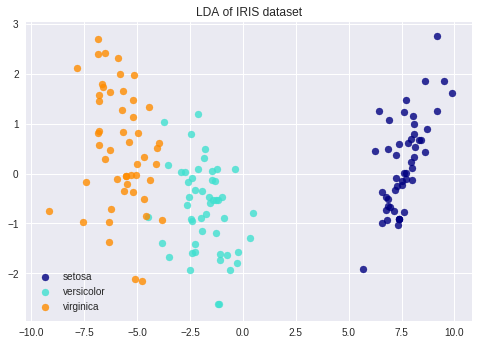

In [16]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

###Segundo Exemplo:

Neste outro exemplo, é aplicado o LDA em dados que apresentam as seguintes características:
*   Matriz de covariâncias iguais
*   Matriz de covariâncias diferentes

Inicialmente iremos carregar as bibliotecas que serão utilizadas:


In [0]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Para resolver esse problema serão geradas amostras com matriz de covariância igual e com variância diferente. A função dataset_fixed_cov gera uma matriz com covariância igual e a função dataset_cov gera uma matriz com covariância diferente.


In [0]:
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# Geração das matrizes de covariância
def dataset_fixed_cov():
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

Agora, temos agumas funções necessárias para plotar o nosso exemplo:

In [0]:
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('LDA')
        plt.ylabel('Dados com\n covariancia igual')
    else:
        plt.ylabel('Dados com\n covariancia diferente')

    tp = (y == y_pred)  
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  

    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k') 

    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


Conforme dito anteriormente, a biblioteca scikit learn possui uma implementação do algoritmo LDA. O método fit ajusta o modelo de acordo com os dados e parâmetros de treinamento fornecidos e, então, a função predict será utilizada para determinar a qual classe pertence cada uma das entradas Utilize a implementação do LDA (usando a função predict) no código abaixo: 

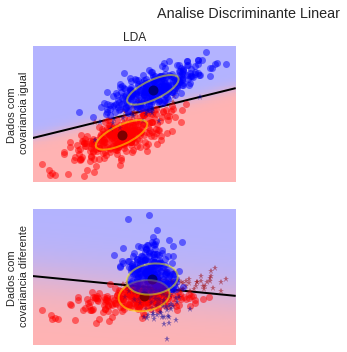

In [22]:
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

plt.suptitle('Analise Discriminante Linear')
plt.show()
    

##Conclusão:

Conforme podemos observar na figura acima, o método LDA é mais eficaz para dados com matriz de covariância igual. Para dados com matriz de covariâncias diferentes, o mais indicado é utilizar o método QDA (Análise Discriminante Quadrática).
